In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes_risk_prediction_dataset.csv')

Age: Age of the individual (1.20-65).\
Sex: Gender of the individual (1. Male, 2. Female).\
Polyuria: Presence of excessive urination (1. Yes, 2. No).\
Polydipsia: Excessive thirst (1. Yes, 2. No).\
Sudden Weight Loss: Abrupt weight loss (1. Yes, 2. No).\
Weakness: Generalized weakness (1. Yes, 2. No).\
Polyphagia: Excessive hunger (1. Yes, 2. No).\
Genital Thrush: Presence of genital thrush (1. Yes, 2. No).\
Visual Blurring: Blurring of vision (1. Yes, 2. No).\
Itching: Presence of itching (1. Yes, 2. No).\
Irritability: Display of irritability (1. Yes, 2. No).\
Delayed Healing: Delayed wound healing (1. Yes, 2. No).\
Partial Paresis: Partial loss of voluntary movement (1. Yes, 2. No).\
Muscle Stiffness: Presence of muscle stiffness (1. Yes, 2. No).\
Alopecia: Hair loss (1. Yes, 2. No).\
Obesity: Presence of obesity (1. Yes, 2. No).\
Class: Diabetes classification (1. Positive, 2. Negative).\
\
In further analysis:\
Yes - has been converted to 1\
No - has been converted to 0\
For 'Class', Positive has been converted to 'Diabetic', negative to 'Non-Diabetic'

In [3]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [4]:
df.columns = [column.capitalize() for column in df.columns]
df

,Age,Gender,Polyuria,Polydipsia,Sudden weight loss,Weakness,Polyphagia,Genital thrush,Visual blurring,Itching,Irritability,Delayed healing,Partial paresis,Muscle stiffness,Alopecia,Obesity,Class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [5]:
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_data

Age                   0
Itching               0
Obesity               0
Alopecia              0
Muscle stiffness      0
Partial paresis       0
Delayed healing       0
Irritability          0
Visual blurring       0
Gender                0
Genital thrush        0
Polyphagia            0
Weakness              0
Sudden weight loss    0
Polydipsia            0
Polyuria              0
Class                 0
dtype: int64

There is no missing data.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   Sudden weight loss  520 non-null    object
 5   Weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   Visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  Delayed healing     520 non-null    object
 12  Partial paresis     520 non-null    object
 13  Muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  Class               520 no

In [7]:
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [8]:
#Changing format

mapping = {"Negative": "Non-Diabetic", "Positive": "Diabetic"}

df['Class'] = df['Class'].map(mapping)
        
df

,Age,Gender,Polyuria,Polydipsia,Sudden weight loss,Weakness,Polyphagia,Genital thrush,Visual blurring,Itching,Irritability,Delayed healing,Partial paresis,Muscle stiffness,Alopecia,Obesity,Class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Diabetic
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Diabetic
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Diabetic
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Diabetic
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Diabetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Diabetic
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Diabetic
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Diabetic
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Non-Diabetic


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   Sudden weight loss  520 non-null    object
 5   Weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   Visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  Delayed healing     520 non-null    object
 12  Partial paresis     520 non-null    object
 13  Muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  Class               520 no

Exploratory Data Analysis (EDA)

In [10]:
#Checking number of people with Diabetes, healthy ones and split per gender

class_split = df.groupby('Class')['Gender'].value_counts().unstack()

class_split['Total'] = class_split.sum(axis=1)
class_split.loc['Total'] = class_split.sum()

class_split

Gender,Female,Male,Total
Class,,,
Diabetic,173,147,320
Non-Diabetic,19,181,200
Total,192,328,520


For 520 individuals, over half of them (61%) are diagnosed with diabetes. 

<Figure size 1000x600 with 0 Axes>

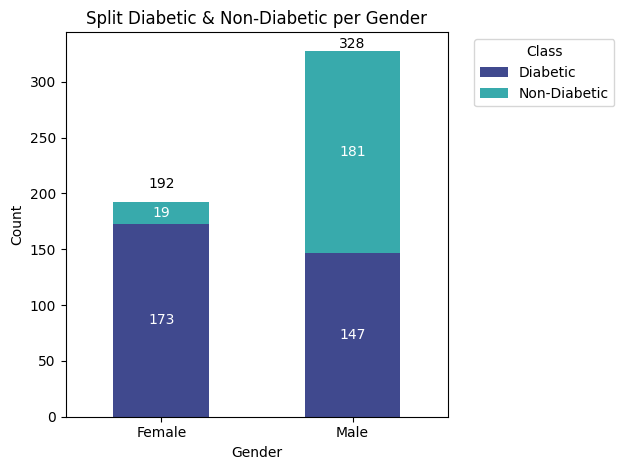

In [11]:
# Vizualization of gender with split for Diabetic an Non-Diabetic

gender_split = df.groupby('Gender')['Class'].value_counts().unstack()
totals = df.groupby('Gender')['Class'].value_counts().unstack().sum(axis=1)

palette = sns.color_palette('mako', len(gender_split.columns))

# Barchart 
plt.figure(figsize=(10,6))
bars = gender_split.plot(kind='bar', stacked=True, color=palette)
plt.title('Split Diabetic & Non-Diabetic per Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Class')

# Moving legend to the right
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
# bbox_to_anchor uses coordinates to place the legend. 
# The value (1.05, 1) indicates that the upper left corner of the legend 
# will be positioned slightly outside the plot, specifically 5% of the plot's width
# to the right and at the very top. The value 1.05 corresponds to the horizontal axis (X-axis), 
# and 1 corresponds to the vertical axis (Y-axis)

#loc='upper left' means that the reference point for positioning the legend (in this case, 
# the upper left corner mentioned earlier) will be placed in the upper left corner of bbox_to_anchor.


# Adding counts inside the bars
for bar in bars.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    label_x = x + width / 2
    label_y = bar.get_y() + height / 2
    value = f'{height:.0f}'
    
    if height > 5:  # Adjust this threshold as needed
        plt.text(label_x, label_y, value, ha='center', va='center', color='white')

# Adjusting placement to totals over the bars
offsets = [10, 0]  # You might need to adjust these offsets

# Adding totals over the bars with individual offsets
for i, (total, offset) in enumerate(zip(totals, offsets)):
    plt.text(i, total + offset, f'{total:.0f}', ha='center', va='bottom')

plt.tight_layout()    
plt.show()


Females group is smaller and majority of them are diagnosed with diabetes. 
In future analysis it might be interesting to check, whether they are more likely to get sick or they are testing themselves more often than mans. 

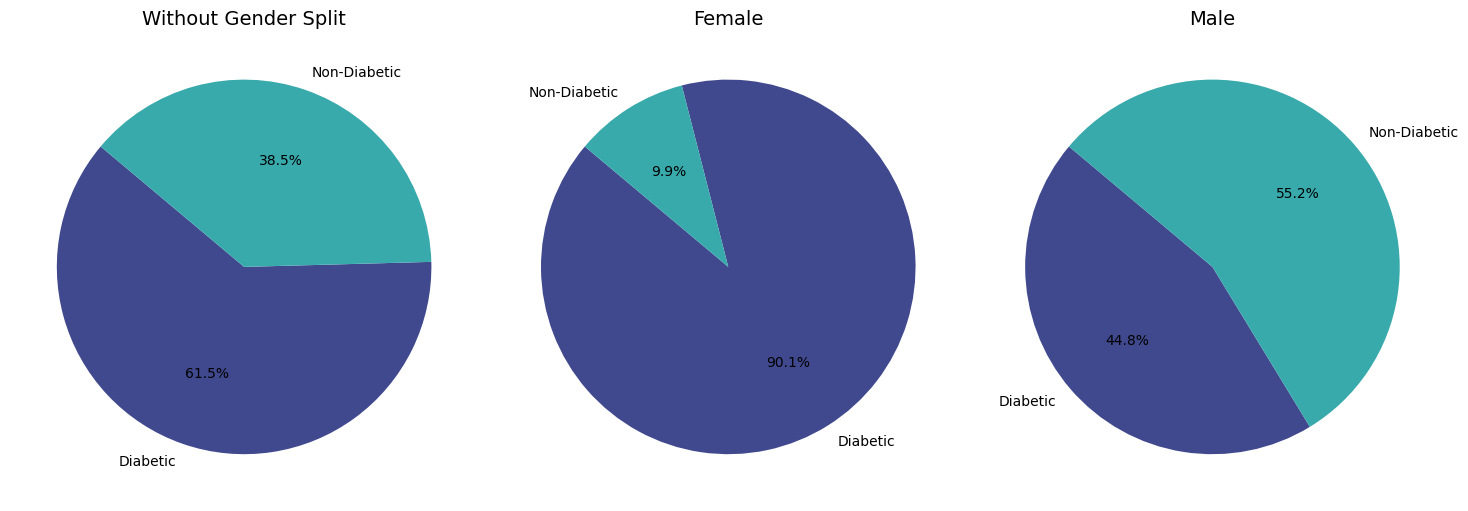

In [12]:
#Vizualization of Diabetic and Non-Diabetic with Gender split
gender_class_counts = df.groupby('Gender')['Class'].value_counts().unstack()

#Extracting data for Female and Male
gender_class_counts_sum = gender_class_counts.sum()
data_female = gender_class_counts.loc['Female']
data_male = gender_class_counts.loc['Male']

palette = sns.color_palette('mako', len(data_female))

# Pie chart
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].pie(gender_class_counts_sum, labels=gender_class_counts_sum.index, autopct='%1.1f%%', startangle=140, colors=palette)
ax[0].set_title('Without Gender Split', fontsize=14)

# Adjust the palette if needed for female
palette_female = sns.color_palette('mako', len(data_female))

# Piechart for Female
ax[1].pie(data_female, labels=data_female.index, autopct='%1.1f%%', startangle=140, colors=palette_female)
ax[1].set_title('Female', fontsize=14)

# Adjust the palette if needed for male
palette_male = sns.color_palette('mako', len(data_male))

# Piechart for Male
ax[2].pie(data_male, labels=data_male.index, autopct='%1.1f%%', startangle=140, colors=palette_male)
ax[2].set_title('Male', fontsize=14)

# Displaying the plot
plt.tight_layout()
plt.show()


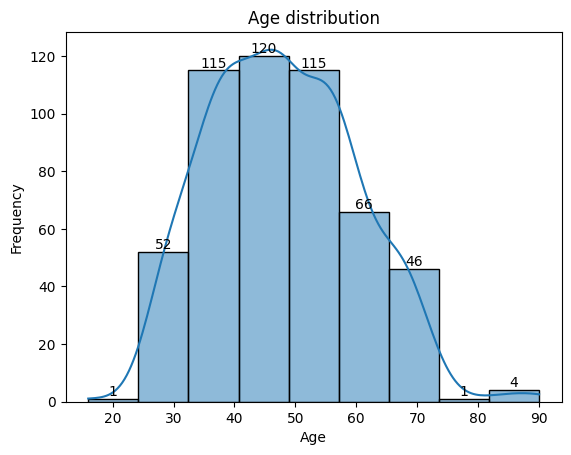

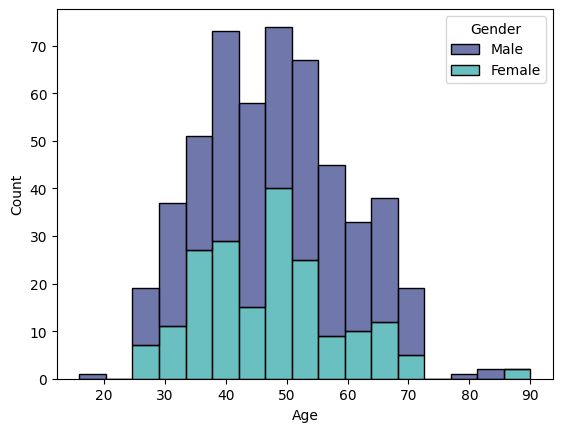

In [13]:
#Vizualization of age structure

sns.histplot(df['Age'], bins=9, kde=True, palette='flare')
#kde - trend line
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution')

# Get the counts for each bin
counts, bins = np.histogram(df['Age'], bins=9)

# Calculate bin centers
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Display counts above the bars
for count, x in zip(counts, bin_centers):
    # Only display the count above the bar if it's non-zero
    if count > 0:
        plt.text(x, count, str(count), ha='center', va='bottom')
    
plt.show()

sns.histplot(data=df, x="Age", hue="Gender", multiple="stack", palette="mako")

plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

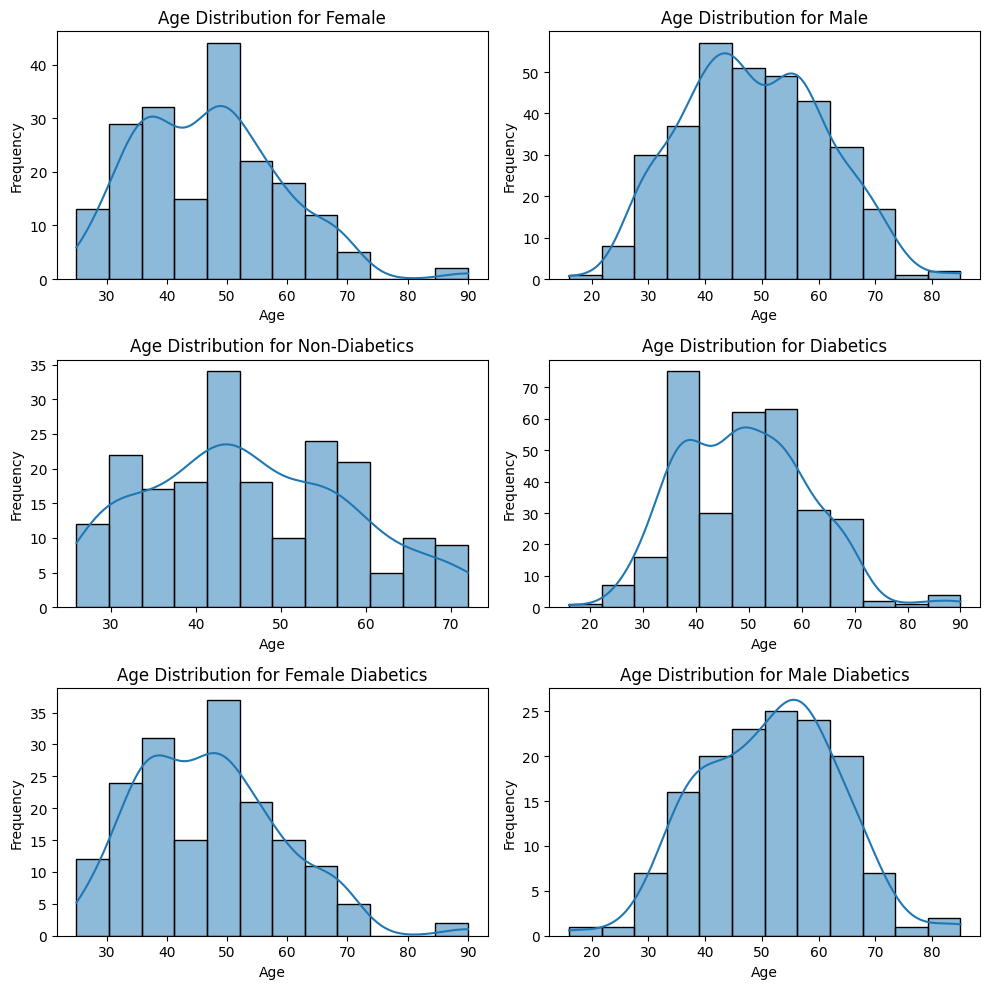

In [14]:
# Visualization of Age structure Diabetic and Non_diabetic 
fig, ax = plt.subplots(3, 2, figsize=(10, 10))

# Histogram for Age Distribution of Female
sns.histplot(df[df['Gender'] == 'Female']['Age'], bins=12, kde=True, ax=ax[0, 0], palette='mako')
ax[0, 0].set_title('Age Distribution for Female')
ax[0, 0].set_xlabel('Age')
ax[0, 0].set_ylabel('Frequency')

# Histogram for Age Distribution of Male
sns.histplot(df[df['Gender'] == 'Male']['Age'], bins=12, kde=True, ax=ax[0, 1], palette='mako')
ax[0, 1].set_title('Age Distribution for Male')
ax[0, 1].set_xlabel('Age')
ax[0, 1].set_ylabel('Frequency')

# Histogram for Non-Diabetic Age Distribution
sns.histplot(df[df['Class'] == 'Non-Diabetic']['Age'], bins=12, kde=True, ax=ax[1, 0], palette='flare')
ax[1, 0].set_title('Age Distribution for Non-Diabetics')
ax[1, 0].set_xlabel('Age')
ax[1, 0].set_ylabel('Frequency')

# Histogram for Diabetic Age Distribution
sns.histplot(df[df['Class'] == 'Diabetic']['Age'], bins=12, kde=True, ax=ax[1, 1], palette='flare')
ax[1, 1].set_title('Age Distribution for Diabetics')
ax[1, 1].set_xlabel('Age')
ax[1, 1].set_ylabel('Frequency')

# Histogram for Female Diabetics Age Distribution
sns.histplot(df[(df['Gender'] == 'Female') & (df['Class'] == 'Diabetic')]['Age'], bins=12, kde=True, ax=ax[2, 0], palette='mako')
ax[2, 0].set_title('Age Distribution for Female Diabetics')
ax[2, 0].set_xlabel('Age')
ax[2, 0].set_ylabel('Frequency')

# Histogram for Male Diabetics Age Distribution
sns.histplot(df[(df['Gender'] == 'Male') & (df['Class'] == 'Diabetic')]['Age'], bins=12, kde=True, ax=ax[2, 1], palette='mako')
ax[2, 1].set_title('Age Distribution for Male Diabetics')
ax[2, 1].set_xlabel('Age')
ax[2, 1].set_ylabel('Frequency')

# Displaying the plot
plt.tight_layout()
plt.show()


Data indicates that diabetes occures earlier in life for women (between 30 and 50), while pick for man is after 50 yo.

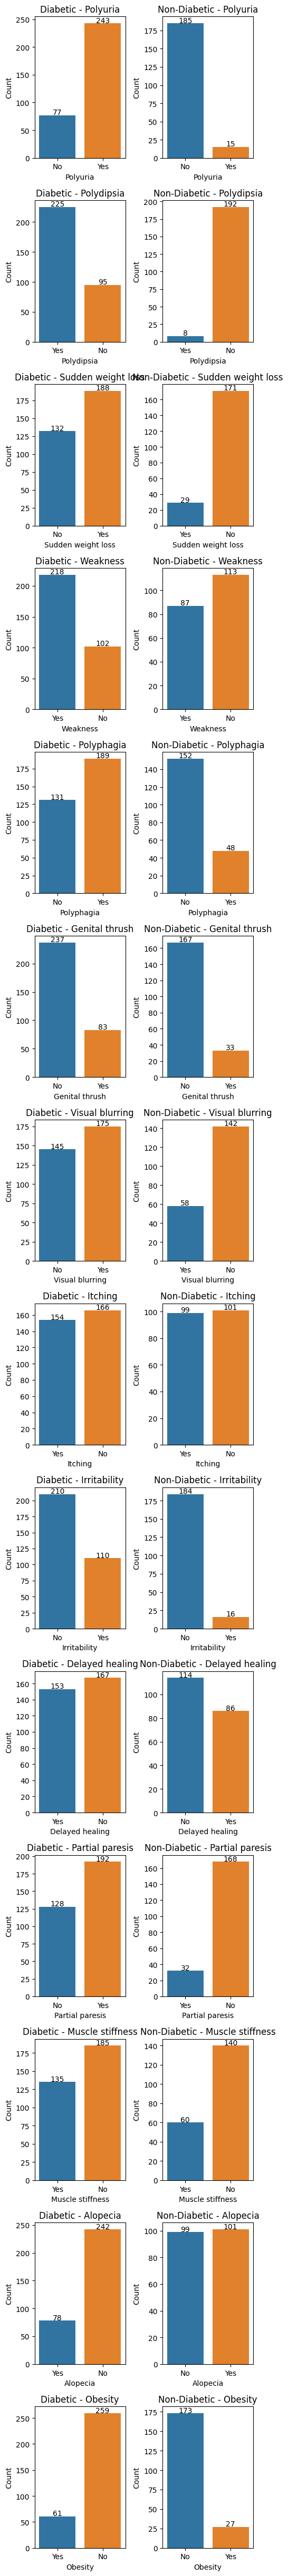

In [15]:
#Visualization of features shown number of people Non-Diabetic and Diabetic separately 

# Selecting the features for the graphs (excluding 'Gender', 'Age', and 'Class')
features = df.columns.drop(['Gender', 'Age', 'Class'])

# Setting up the plotting environment
num_features = len(features)
fig, axes = plt.subplots(num_features, 2, figsize=(5, 3.5 * num_features))

# Plotting the graphs with detailed split per feature
for i, feature in enumerate(features):
    # Diabetic group
    ax_diabetic = sns.countplot(data=df[df['Class'] == 'Diabetic'], x=feature, ax=axes[i, 0])
    axes[i, 0].set_title(f'Diabetic - {feature}')
    axes[i, 0].set_xlabel(feature)
    axes[i, 0].set_ylabel('Count')

    # Non-diabetic group
    ax_nondiabetic = sns.countplot(data=df[df['Class'] == 'Non-Diabetic'], x=feature, ax=axes[i, 1])
    axes[i, 1].set_title(f'Non-Diabetic - {feature}')
    axes[i, 1].set_xlabel(feature)
    axes[i, 1].set_ylabel('Count')

    # Totals over each bar
    for ax in [ax_diabetic, ax_nondiabetic]:
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', 
                        xytext=(0, 4), textcoords='offset points')

plt.tight_layout()
plt.show()

The most significant symptoms of upcoming diabetes are polydipsia and polyuria.

In [16]:
mapping = {"Yes":1, "No":0, "Non-Diabetic" : 0, "Diabetic":1}

for column in df.columns:
    if column != "Gender" and column != "Age":
        df[column] = df[column].apply(mapping.get)
df


,Age,Gender,Polyuria,Polydipsia,Sudden weight loss,Weakness,Polyphagia,Genital thrush,Visual blurring,Itching,Irritability,Delayed healing,Partial paresis,Muscle stiffness,Alopecia,Obesity,Class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,Female,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,Female,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


/var/folders/wb/_r0cx5c12rbcw3ptx03qs66w0000gn/T/ipykernel_15593/2916339987.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.drop(columns=["Class"]).corr()


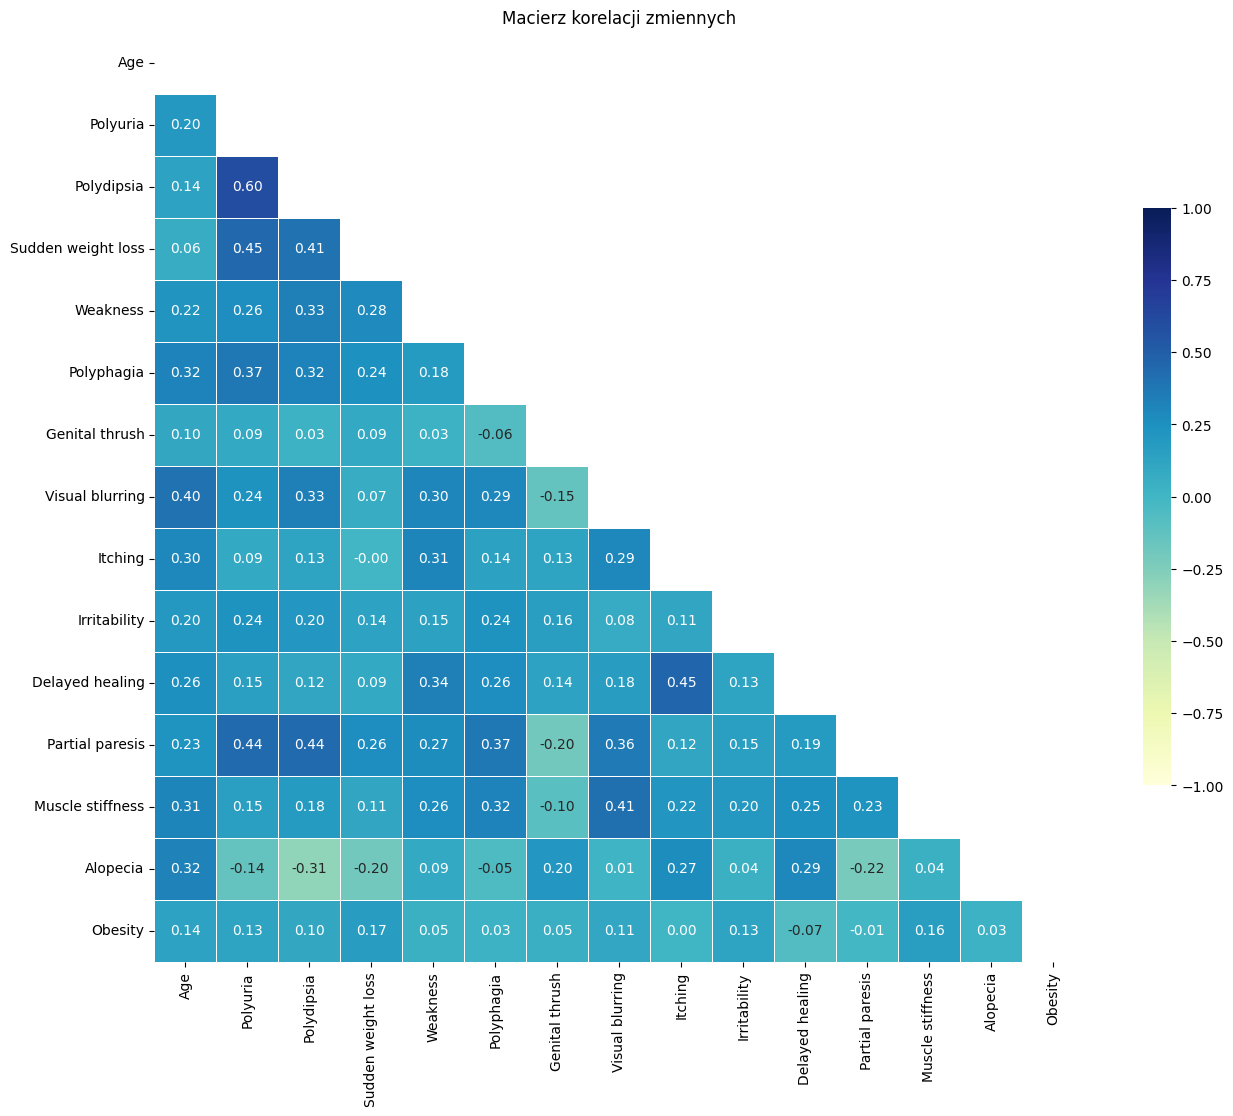

In [17]:
#Corelation

corr = df.drop(columns=["Class"]).corr()

threshold = 0.3

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15, 15))
sns.heatmap(corr, mask=mask, cmap='YlGnBu', vmax=1, vmin=-1, center=0, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

plt.title('Macierz korelacji zmiennych')
plt.show()

Correlation matrix shows that the strongest positive correlation is between polyuria and polydispia.\
There is also observed correlation between:
- sudden weight loss and polyuria,
- delayed healing with itcing,
- parial paresis with polyuria & polydispia,
- muscle stiffness and visual blurring.

Machine Learning

In [18]:
#imports for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import (DecisionTreeRegressor,plot_tree)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve

In [19]:
df = pd.concat([df.drop(columns=["Gender"]), pd.get_dummies(df["Gender"], drop_first=True)], axis=1)
df

,Age,Polyuria,Polydipsia,Sudden weight loss,Weakness,Polyphagia,Genital thrush,Visual blurring,Itching,Irritability,Delayed healing,Partial paresis,Muscle stiffness,Alopecia,Obesity,Class,Male
0,40,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,1
1,58,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,1
2,41,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,1
3,45,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,1
4,60,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1,0
516,48,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1,0
517,58,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1,0
518,32,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0


In [20]:
X, y = df.drop(columns=["Class"]), df["Class"]

In [21]:
X

,Age,Polyuria,Polydipsia,Sudden weight loss,Weakness,Polyphagia,Genital thrush,Visual blurring,Itching,Irritability,Delayed healing,Partial paresis,Muscle stiffness,Alopecia,Obesity,Male
0,40,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,1,1,0,1,0,0,1,0,1,1,0,0,0,0
516,48,1,1,1,1,1,0,0,1,1,1,1,0,0,0,0
517,58,1,1,1,1,1,0,1,0,0,0,1,1,0,1,0
518,32,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [22]:
y

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: Class, Length: 520, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train.shape

(416, 16)

In [25]:
y_train.shape

(416,)

In [26]:
X_train.head()

,Age,Polyuria,Polydipsia,Sudden weight loss,Weakness,Polyphagia,Genital thrush,Visual blurring,Itching,Irritability,Delayed healing,Partial paresis,Muscle stiffness,Alopecia,Obesity,Male
434,53,1,1,1,1,1,0,1,0,1,0,1,0,1,0,1
436,41,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1
208,54,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1
332,50,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0
220,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [27]:
y_train.value_counts()

1    249
0    167
Name: Class, dtype: int64

In [28]:
y_test.value_counts()

1    71
0    33
Name: Class, dtype: int64

In [31]:
lr = LogisticRegression(max_iter=10000)

In [32]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [33]:
pred = lr.predict(X_test)

In [34]:
#accuracy - efficiency factor; ration of correct predictions to all predictions. 
# true positive + true negative / total of 
accuracy = accuracy_score(y_test, pred)


#true positive / (true positive + false positive)
#shows queslity of the model's positive predictions
precision = precision_score(y_test, pred)

#true positive / (true positive + false negative)
# measures the model's ability to find relevant instances in the data
recall = recall_score(y_test, pred)

f1 = f1_score(y_test, pred)
#harmonic mean of precission and recall, so it concideres both metrics

print(f"Accuracy: {accuracy}\n\nPrecision: {precision}\n\nRecall: {recall}\n\nF1: {f1}")


#True negatives: correctly predicted negatives (zeros)
#True positives: correctly predicted positives (ones)
#False negatives: incorrectly predicted negatives (zeros)
#False positives: incorrectly predicted positives (ones)

Accuracy: 0.9230769230769231

Precision: 0.9315068493150684

Recall: 0.9577464788732394

F1: 0.9444444444444444


[[28  5]
 [ 3 68]]


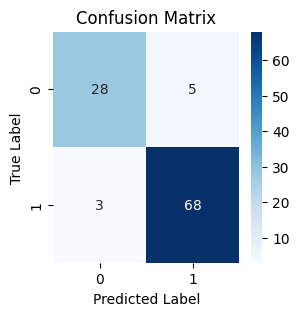

In [35]:
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104



ML - Decission Tree

In [39]:
dtr = DecisionTreeRegressor(max_depth=5)

In [40]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

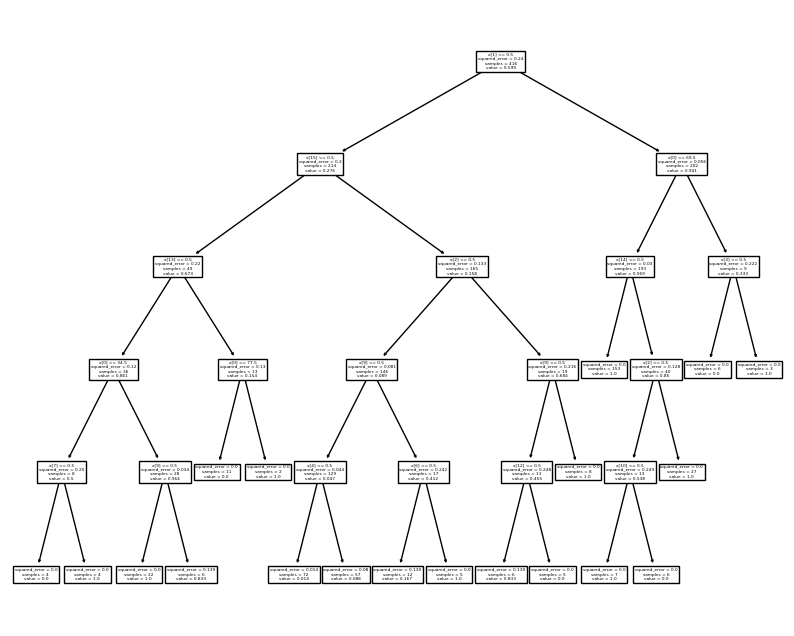

In [41]:
plt.figure(figsize=(10,8))
plot_tree(dtr);

In [42]:
print("Accuracy on training set: {:.2f}".format(dtr.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(dtr.score(X_test, y_test)))

Accuracy on training set: 0.91
Accuracy on test set: 0.86


In [43]:
#Checking best model

param_grid = {'max_depth': [3, 4, 5, 6, 7], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(dtr, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 7, 'min_samples_split': 5}


In [ ]:
KNN 

In [45]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [46]:
print("Accuracy on training set: {:.2f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(knn.score(X_test, y_test)))

Accuracy on training set: 0.91
Accuracy on test set: 0.86


[[30  3]
 [12 59]]


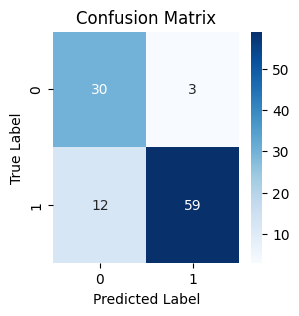

In [47]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Summary: 

Logistic Regression appears to be the best model in this case as it has the best accuracy and other metrics. 

It seem like the models are better at predicting true positive class than false negative.